# Leetcode 

212. Word Search II

https://leetcode.com/problems/word-search-ii/description/


**Description**

    Given an m x n board of characters and a list of strings words, return all words on the board.

    Each word must be constructed from letters of sequentially adjacent cells, where adjacent cells are horizontally or vertically neighboring. The same letter cell may not be used more than once in a word.


**Examples**

    Example 1:


    Input: board = [["o","a","a","n"],["e","t","a","e"],["i","h","k","r"],["i","f","l","v"]], words = ["oath","pea","eat","rain"]
    Output: ["eat","oath"]
    Example 2:


    Input: board = [["a","b"],["c","d"]], words = ["abcb"]
    Output: []


**Constraints**

    m == board.length
    n == board[i].length
    1 <= m, n <= 12
    board[i][j] is a lowercase English letter.
    1 <= words.length <= 3 * 10^4
    1 <= words[i].length <= 10
    words[i] consists of lowercase English letters.
    All the strings of words are unique

In [29]:
class TrieNode:
    def __init__(self):
        self.children = {}
        self.isWord = False
        self.refs = 0
    
    def addWord(self, word):
        root = self
        root.refs +=1
        for w in word:
            if w not in root.children:
                root.children[w] = TrieNode()
            root = root.children[w]
            root.refs +=1
        root.isWord = True
    
    def removeWord(self, word):
        root = self
        root.refs -=1
        for w in word:
            if w in root.children:
                root = root.children[w]
                root.refs -=1

class Solution:
    def findWords(self, board:list[list[str]], words: list[str]) -> list[str]:
        root = TrieNode()
        for w in words:
            root.addWord(w)

        COLS, ROWS = len(board[0]), len(board)
        answer, visited = set(), set()

        def dfs(r, c, node, word):
            if (r<0 or c<0 or r==ROWS or c==COLS or (r,c) in visited or board[r][c] not in node.children or node.children[board[r][c]].refs <1):
                return False

            visited.add((r,c))
            node = node.children[board[r][c]]
            word += board[r][c]
            if node.isWord:
                node.isWord = False
                answer.add((word))
                root.removeWord(word)
                     
            dfs(r-1, c, node, word)
            dfs(r+1, c, node, word)
            dfs(r, c-1, node, word)
            dfs(r, c+1, node, word)
            visited.remove((r,c))

        for row in range(ROWS):
            for col in range(COLS):
                dfs(row, col, root, '')

        return list(answer)
        

In [31]:
sol = Solution()
sol.findWords(board = [["o","a","a","n"],["e","t","a","e"],["i","h","k","r"],["i","f","l","v"]], words = ["oath","pea","eat","rain"])

['oath', 'eat']

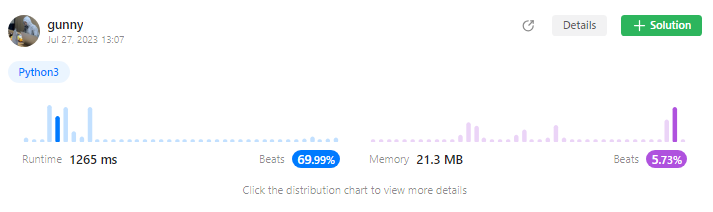